# OpenCitations Notebook
### Arianna Moretti

## Table of Contents

#### 2022

1. [22/02 - 02/03 (Log Data Study)](#entry_1)
2. [02/03 - 09/03 (OC Index Software Code Refactoring - NOCI + Mapping Merge)](#entry_2)
3. [09/03 - 15/03 (_____________)](#entry_3)
4. [15/03 - 22/03 (Prometheus file format study and data extraction)](#entry_4)
5. [15/03 - 22/03 (Prometheus file format visualization - Python)](#entry_5)

#### 202*

5. [??/?? - ??/?? (????)](#entry_6)

# 22/02 - 02/03 (Log Data Study) <a class="anchor" id="entry_1"></a>

### Studio Files di Log Raw

<ul>
    <li>Download cartella Dropbox con file di log raw per 2021</li>
    <li>Studio dei dati statistici: <a href="https://github.com/opencitations/statistics/tree/master/script">opencitations statistics repo </a> </li>
    <li>Studio del file format Prometheus: <a href="https://sysdig.com/blog/prometheus-metrics/"> https://sysdig.com/blog/prometheus-metrics/</a>, <a href="https://prometheus.io/docs/instrumenting/clientlibs/"> https://prometheus.io/docs/instrumenting/clientlibs/</a>
    <li>Esempio di <a href="http://opencitations.net/statistics/2022-01">call API per i dati di Log di Gennaio 2021</a> </li>
</ul>

#### Prometheus File Format
Prometheus is an open source time series database including a collection of client libraries which allow metrics to be published, so to be collected by the metrics server. The Prometheus metrics format is largely adopted and became also an independent project: OpenMetrics, aimed at making this metric format specification a standard. Sysdig Monitor dynamically detects and scrape Prometheus metrics.
##### Custom Metrics
Source: <a href="https://sysdig.com/blog/how-to-instrument-code-custom-metrics-vs-apm-vs-opentracing/">href="https://sysdig.com/blog/how-to-instrument-code-custom-metrics-vs-apm-vs-opentracing/</a>
Custom Metrics (JMX, Golang expvar, Prometheus, statsd...) is an approach on how to instrument code to easily monitor the performance and troubleshooting of an application. Typical aspects to be monitored are: the most visited components a web page, the slowest components to load, the difference of speed in loading the frontend and the backend, which factors affect the speed of the process (location, browser, device). The options to monitor those aspects are: using an APM instrument, using OpenTracing libraries, or generating metrics ad-hoc for specific components.

##### Comparison between CM, APM and Opentracing

|Issue | Custom Metrics | APM | Opentracing |
| --- | --- | --- | --- |
| Code-related problems | Devs need to provide metrics with performance in code but are not as easy to identify | Yes | Yes |
| Infrastructure-related problems | Yes | No | No |
| Node and service level aggregation | Yes | No | No |
| Standard implementaton | Some languages include a standard way to implement them: (Prometheus, Java JMX, Go expvar, …) | No | Yes |
| Allows capacity planning | Yes | No | No |
| Allows complete statistical measurements | Yes | No | No |
| Cloud Native Computing Foundation standard | Prometheus metrics only | No | Yes |
| Distributed application analysis | Yes, without per trace analysis | Yes | Yes |
| Useful for developers for pre-production environments | Yes | Yes | Yes |
| Useful for complete DevOps strategy | Yes | No | No |

##### Metrics notations: dot notation vs multi-dimensional tagged metrics
Source: <a href="https://sysdig.com/blog/prometheus-metrics/">https://sysdig.com/blog/prometheus-metrics/</a>
For Python we need the third-party library Prometheu to feed the monitoring system.
There are two main paradigms to represent a metric: <b>dot notation</b> and <b>multi-dimensional tagged metrics</b>.
In a dot-notated metric, data are provided in dot-separated format in the name of the metric, which determine the detail and the hierarchy needed. The arrangement of the metric depends on the piece of information needed. 
In Prometheus metric format a flat approach is adopted to metrics naming. Instead of a hierarchical, dot separated name, there are names combined with a series of labels or tags. "Highly dimensional data" imply the possibility to associate any number of context-specific labels to every submitted metric.

##### Prometheus metrics (OpenMetrics)
Prometheus metrics format is line oriented: lines are separated by a line feed character (n), and the last line must end with a line feed character, while empty lines are somply ignored.

A metric is composed by the (optional) components below:

<ul>
    <li>Metric name</li>
    <li>Any number of labels (can be 0), represented as a key-value array</li>
    <li>Current metric value</li>
    <li>Optional metric timestamp</li>
</ul>

Metric output is typically preceded with **# HELP** and **# TYPE** metadata lines.
The HELP string identifies the metric name and a brief description of it. The TYPE string identifies the type of metric. If there’s no TYPE before a metric, the metric is set to untyped. Everything else that starts with a # is parsed as a comment.

(**continua*)

##### Implement Prometheus custom metric instrumentation in Python



## 02/03 - 09/03 (OC Index Software Code Refactoring - NOCI + Mapping Merge) <a class="anchor" id="entry_2"></a>

### NOCI material

1. **OpenCitations Index espansion**

   1.1 *ADDITIONS*
    
      1.1.1 [NIH citation source](#en_1.1.1)

      1.1.2 [NOCI glob](#en_1.1.2)

      1.1.3 [PMID manager](#en_1.1.3)

      1.1.4 [NIH resource finder](#en_1.1.4)
        
   1.2 *ADJUSTMENTS / EXPANSIONS*
    
      1.2.1 [citation/oci.py](#en_1.2.1)
        
      1.2.2 [finder/resourcefinder.py](#en_1.2.2)
        
      1.2.3 [finder/dataciteresourcefinder.py](#en_1.2.3)
      
      1.2.4 [finder/crossrefresourcefinder.py](#en_1.2.4)
      
      1.2.5 [finder/orcidresourcefinder.py](#en_1.2.5)
      
      1.2.6 [storer/csvmanager.py](#en_1.2.6)
      
      1.2.7 [storer/datahandler.py](#en_1.2.7)
      
      1.2.8 [storer/update.py](#en_1.2.8)
      
      1.2.9 [cnc.py](#en_1.2.9)
      
      
        
2. **Ramose**

    2.1 [NOCI configuration file](#en_2.1)
    
    2.2 [indexapi.py extension](#en_2.2)


### 1.1.1 NIH citation source <a class="anchor" id="en_1.1.1"></a>

Codice della citation source per il National Institute of Health. Il dataset citazionale (NIH-OCC) fornisce solo le informazioni minime richieste dall'OpenCitations data model, ovvero **citante** e **citato**, espressi rispettivamente nei campi "citing" e "referenced" del file CSV del NIH-OCC.
Il codice è stato testato con successo. 
Di seguito, il codice del NIH citation source e del rispettivo test case. 

In [ ]:
from os import walk, sep, remove
from os.path import isdir
from json import load
from csv import DictWriter
from index.citation.citationsource import CSVFileCitationSource
from index.identifier.pmidmanager import PMIDManager
from index.citation.oci import Citation, OCIManager


class NIHCitationSource( CSVFileCitationSource ):
    def __init__(self, src, local_name=""):
        self.pmid = PMIDManager()
        super( NIHCitationSource, self ).__init__( src, local_name )

    def get_next_citation_data(self):
        row = self._get_next_in_file()
        #id_type = OCIManager.pmid_type

        while row is not None:
            citing = self.pmid.normalise(row.get("citing"))
            cited = self.pmid.normalise(row.get("referenced"))

            self.update_status_file()
            return citing, cited, None, None, None, None #, id_type
            self.update_status_file()
            row = self._get_next_in_file()

        remove(self.status_file)

### test/10_noci

In [ ]:
import unittest
from index.coci.glob import process
from os import sep, makedirs
from os.path import exists
from shutil import rmtree
from index.storer.csvmanager import CSVManager
from index.noci.nationalinstituteofhealthsource import NIHCitationSource
from csv import DictReader


class NOCITest(unittest.TestCase):

    def setUp(self):
        self.input_file = "index%stest_data%snih_dump%ssource.csv" % (sep, sep, sep)
        self.citations = "index%stest_data%snih_dump%scitations.csv" % (sep, sep, sep)

    def test_citation_source(self):
        ns = NIHCitationSource( self.input_file )
        new = []
        cit = ns.get_next_citation_data()
        while cit is not None:
            citing, cited, creation, timespan, journal_sc, author_sc = cit
            new.append({
                "citing": citing,
                "cited": cited,
                "creation": "" if creation is None else creation,
                "timespan": "" if timespan is None else timespan,
                "journal_sc": "no" if journal_sc is None else journal_sc,
                "author_sc": "no" if author_sc is None else author_sc
            })
            cit = ns.get_next_citation_data()

        with open(self.citations, encoding="utf8") as f:
            old = list(DictReader(f))

        self.assertEqual(new, old)

### 1.1.2 NOCI glob <a class="anchor" id="en_1.1.2"></a>
L' iCite Database contenente il NIH-OCC, ovvero la data source di NOCI, e un altro dataset: **iCite Metadata**. Se il NIH-OCC contiene solamente dati citazionali rappresentati dai PMID del citante e del citato, iCite Metadata contiene metadati relativi alle entità bibliografiche (identificate da PMID) coinvolte nelle citazioni contenute nel NIH-OCC. iCite Metadata contiene dunque delle informazioni che possono essere rielaborate al fine di ricavarne (direttamente o indirettamente) i metadati utili a completare i quattro campi della tupla a sei elementi non coperti dal NIH-OCC.
Tra i campi del dataset iCite Metadata, **"doi"** fornisce l'informazione di **mapping** PMID-DOI. Questo dato è particolarmente utile perché permette di sfruttare i servizi API dei DOI per ricavare le informazioni che non vengono fornite né in iCite Metadata né nei servizi API dei PMIDs. 
I dati ricavati sono salvati in files CSV che vengono utilizzati come materiale di supporto nel processo di popolazione dell'Indice citazionale. 
Di seguito, il codice del glob di NOCI e il relativo test, passato con successo.

In [ ]:
import pandas as pd
from argparse import ArgumentParser
from index.storer.csvmanager import CSVManager
from index.finder.crossrefresourcefinder import CrossrefResourceFinder
from index.finder.orcidresourcefinder import ORCIDResourceFinder
from index.identifier.pmidmanager import PMIDManager
from index.identifier.doimanager import DOIManager
from index.identifier.issnmanager import ISSNManager
from index.identifier.orcidmanager import ORCIDManager
from os import sep, makedirs, walk
import os
from os.path import exists
import json
from re import sub
from index.citation.oci import Citation
from zipfile import ZipFile
from tarfile import TarFile
import re
from timeit import default_timer as timer

def issn_data_recover(directory):
    journal_issn_dict = dict()
    filename = directory + sep + 'journal_issn.json'
    if not os.path.exists(filename):
        return journal_issn_dict
    else:
        with open(filename, 'r', encoding='utf8') as fd:
            journal_issn_dict = json.load(fd)
            types = type(journal_issn_dict)
            return journal_issn_dict

def issn_data_to_cache(name_issn_dict, directory):
    filename = directory + sep + 'journal_issn.json'
    with open(filename, 'w', encoding='utf-8' ) as fd:
            json.dump(name_issn_dict, fd, ensure_ascii=False, indent=4)

#PUB DATE EXTRACTION : takes in input a data structure representing a bibliographic entity
def build_pubdate(row):
    year = str(row["year"])
    str_year = sub( "[^\d]", "", year)[:4]
    if str_year:
        return str_year
    else:
        return None


# get_all_files extracts all the needed files from the input directory
def get_all_files(i_dir):
    result = []
    opener = None

    if i_dir.endswith( ".zip" ):
        zf = ZipFile( i_dir )
        for name in zf.namelist():
            if name.lower().endswith(".csv") and "citations" not in name.lower() and "source" not in name.lower():
                result.append( name )
        opener = zf.open
    elif i_dir.endswith( ".tar.gz" ):
        tf = TarFile.open( i_dir )
        for name in tf.getnames():
            if name.lower().endswith(".csv") and "citations" not in name.lower() and "source" not in name.lower():
                result.append(name)
        opener = tf.extractfile

    else:
        for cur_dir, cur_subdir, cur_files in walk(i_dir):
            for file in cur_files:
                if file.lower().endswith( ".csv" ) and "citations" not in file.lower() and "source" not in file.lower():
                    result.append(cur_dir + sep + file)
        opener = open
    return result, opener


def process(input_dir, output_dir, n):
    if not exists(output_dir):
        makedirs(output_dir)

    citing_pmid_with_no_date = set()
    valid_pmid = CSVManager( output_dir + sep + "valid_pmid.csv" )
    valid_doi = CSVManager("index/test_data/crossref_glob" + sep + "valid_doi.csv")
    id_date = CSVManager( output_dir + sep + "id_date_pmid.csv" )
    id_issn = CSVManager( output_dir + sep + "id_issn_pmid.csv" )
    id_orcid = CSVManager( output_dir + sep + "id_orcid_pmid.csv" )
    journal_issn_dict = issn_data_recover(output_dir) #just an empty dict, in case of a code break
    pmid_manager = PMIDManager(valid_pmid)
    crossref_resource_finder = CrossrefResourceFinder(valid_doi)
    orcid_resource_finder = ORCIDResourceFinder(valid_doi)

    doi_manager = DOIManager(valid_doi)
    issn_manager = ISSNManager()
    orcid_manager = ORCIDManager()

    all_files, opener = get_all_files(input_dir)
    len_all_files = len(all_files)

    # Read all the CSV file in the NIH dump to create the main information of all the indexes
    print( "\n\n# Add valid PMIDs from NIH metadata" )
    for file_idx, file in enumerate( all_files, 1 ):
        df = pd.DataFrame()

        for chunk in pd.read_csv(file, chunksize=1000 ):
            f = pd.concat( [df, chunk], ignore_index=True )
            f.fillna("", inplace=True)

            print( "Open file %s of %s" % (file_idx, len_all_files) )
            for index, row in f.iterrows():
                if int(index) !=0 and int(index) % int(n) == 0:
                    print( "Group nr.", int(index)//int(n), "processed. Data from", int(index), "rows saved to journal_issn.json mapping file")
                    issn_data_to_cache(journal_issn_dict, output_dir)

                citing_pmid = pmid_manager.normalise(row['pmid'], True)
                pmid_manager.set_valid(citing_pmid)
                citing_doi = doi_manager.normalise(row['doi'], True)

                if id_date.get_value(citing_pmid) is None:
                    citing_date = Citation.check_date(build_pubdate(row))
                    if citing_date is not None:
                        id_date.add_value(citing_pmid, citing_date)
                        if citing_pmid in citing_pmid_with_no_date:
                            citing_pmid_with_no_date.remove(citing_pmid)
                    else:
                        citing_pmid_with_no_date.add( citing_pmid )

                if id_issn.get_value( citing_pmid ) is None:
                    journal_name = row["journal"]
                    if journal_name: #check that the string is not empty
                        if journal_name in journal_issn_dict.keys():
                            for issn in journal_issn_dict[journal_name]:
                                id_issn.add_value(citing_pmid, issn)
                        else:
                            if citing_doi is not None:
                                json_res = crossref_resource_finder._call_api(citing_doi)
                                if json_res is not None:
                                    issn_set = crossref_resource_finder._get_issn(json_res)
                                    if len(issn_set)>0:
                                        journal_issn_dict[journal_name] = []
                                    for issn in issn_set:
                                        issn_norm = issn_manager.normalise(str(issn))
                                        id_issn.add_value( citing_pmid, issn_norm )
                                        journal_issn_dict[journal_name].append(issn_norm)


                if id_orcid.get_value(citing_pmid) is None:
                    if citing_doi is not None:
                        json_res = orcid_resource_finder._call_api(citing_doi)
                        if json_res is not None:
                            orcid_set = orcid_resource_finder._get_orcid(json_res)
                            for orcid in orcid_set:
                                orcid_norm = orcid_manager.normalise( orcid )
                                id_orcid.add_value(citing_pmid, orcid_norm)

            issn_data_to_cache( journal_issn_dict, output_dir )


    # Iterate once again for all the rows of all the csv files, so to check the validity of the referenced pmids.
    print( "\n\n# Checking the referenced pmids validity" )
    for file_idx, file in enumerate( all_files, 1 ):
        df = pd.DataFrame()

        for chunk in pd.read_csv( file, chunksize=1000 ):
            f = pd.concat( [df, chunk], ignore_index=True )
            f.fillna("", inplace=True)
            print( "Open file %s of %s" % (file_idx, len_all_files) )
            for index, row in f.iterrows():
                if row["references"] != "":
                    ref_string = row["references"].strip()
                    ref_string_norm = re.sub("\s+", " ", ref_string)
                else:
                    print("the type of row reference is", (row["references"]), type(row["references"]))
                    print(index, row )

                cited_pmids = set(ref_string_norm.split(" "))
                for cited_pmid in cited_pmids:
                    if pmid_manager.is_valid(cited_pmid):
                        print("valid cited pmid added:", cited_pmid)
                    else:
                        print("invalid cited pmid discarded:", cited_pmid)

    for pmid in citing_pmid_with_no_date:
        id_date.add_value( pmid, "" )

if __name__ == "__main__":
    arg_parser = ArgumentParser( "Global files creator for NOCI",
                                 description="Process NIH CSV files and create global indexes to enable "
                                             "the creation of NOCI." )
    arg_parser.add_argument( "-i", "--input_dir", dest="input_dir", required=True,
                             help="Either the directory or the zip file that contains the NIH data dump "
                                  "of CSV files." )
    arg_parser.add_argument( "-o", "--output_dir", dest="output_dir", required=True,
                             help="The directory where the indexes are stored." )


    arg_parser.add_argument( "-n", "--num_lines", dest="n", required=True,
                             help="Number of lines after which the data stored in the dictionary for the mapping "
                                  "between a Journal name and the related issns are passed into a JSON cache file" )


    args = arg_parser.parse_args()

    start = timer()
    process(args.input_dir, args.output_dir, args.n)
    end = timer()
    #calculate elapsed time
    print("elapsed time, in seconds:", (end-start))


#python -m index.noci.glob1 -i "index/test_data/nih_dump" -o "index/test_data/nih_glob1" -n 20

### test/13_glob1

In [ ]:
import unittest
from os import sep, remove
import os
from os.path import exists
from index.noci.glob1 import issn_data_recover, issn_data_to_cache, build_pubdate, get_all_files, process
from index.storer.csvmanager import CSVManager
from index.identifier.issnmanager import ISSNManager
from index.identifier.orcidmanager import ORCIDManager
from index.identifier.pmidmanager import PMIDManager
from index.identifier.doimanager import DOIManager
import shutil
import pandas as pd

class MyTestCase( unittest.TestCase ):
    def setUp(self):
        self.dir_with_issn_map = "index%stest_data%sglob_noci%sissn_data_recover%swith_issn_mapping" % (sep, sep, sep, sep)
        self.dir_without_issn_map = "index%stest_data%sglob_noci%sissn_data_recover%swithout_issn_mapping" % (sep, sep, sep, sep)
        self.issn_journal_sample_dict = {"N Biotechnol": ["1871-6784"], "Biochem Med": ["0006-2944"], "Magn Reson Chem": ["0749-1581"]}
        self.data_to_cache_dir = "index%stest_data%sglob_noci%sissn_data_to_cache" % (sep, sep, sep)
        self.get_all_files_dir = "index%stest_data%sglob_noci%sget_all_files" % (sep, sep, sep)
        self.csv_sample = "index%stest_data%sglob_noci%sget_all_files%s1.csv" % (sep, sep, sep, sep)
        self.output_dir = "index%stest_data%sglob_noci%sprocess%soutput" % (sep, sep, sep, sep)
        self.valid_pmid = CSVManager( self.output_dir + sep + "valid_pmid.csv" )
        self.valid_doi = CSVManager( "index/test_data/crossref_glob" + sep + "valid_doi.csv" )
        self.id_date = CSVManager( self.output_dir + sep + "id_date_pmid.csv" )
        self.id_issn = CSVManager( self.output_dir + sep + "id_issn_pmid.csv" )
        self.id_orcid = CSVManager( self.output_dir + sep + "id_orcid_pmid.csv" )
        self.doi_manager = DOIManager(self.valid_doi)
        self.pmid_manager = PMIDManager(self.valid_pmid)
        self.issn_manager = ISSNManager()
        self.orcid_manager = ORCIDManager()
        self.sample_reference = "pmid:7829625"

    def test_issn_data_recover(self):
        #Test the case in which there is no mapping file for journals - issn
        self.assertEqual(issn_data_recover(self.dir_without_issn_map), {})
        #Test the case in which there is a mapping file for journals - issn
        issn_map_dict_len = len(issn_data_recover(self.dir_with_issn_map))
        self.assertTrue(issn_map_dict_len>0)

    def test_issn_data_to_cache(self):
        filename = self.data_to_cache_dir + sep + 'journal_issn.json'
        if exists(filename):
            remove(filename)
        self.assertFalse(exists(filename))
        issn_data_to_cache(self.issn_journal_sample_dict, self.data_to_cache_dir)
        self.assertTrue(exists(filename))

    def test_get_all_files(self):
        all_files, opener = get_all_files( self.get_all_files_dir)
        len_all_files = len(all_files)
        #The folder contains 4 csv files, but two of those contains the words "citations" or "source" in their filenames
        self.assertEqual( len_all_files, 2)

    def test_build_pubdate(self):
        df = pd.DataFrame()
        for chunk in pd.read_csv(self.csv_sample, chunksize=1000):
            f = pd.concat( [df, chunk], ignore_index=True )
            f.fillna( "", inplace=True )
            for index, row in f.iterrows():
                pub_date = build_pubdate(row)
                self.assertTrue(isinstance(pub_date, str))
                self.assertTrue(isinstance(int(pub_date), int))
                self.assertEqual(len(pub_date), 4)

    def test_process(self):
        for files in os.listdir( self.output_dir):
            path = os.path.join( self.output_dir, files )
            try:
                shutil.rmtree(path)
            except OSError:
                os.remove(path)
        self.assertEqual(len(os.listdir(self.output_dir)),0)
        process(self.get_all_files_dir, self.output_dir, 20)
        self.assertTrue(len(os.listdir(self.output_dir))>0)

        df = pd.DataFrame()
        for chunk in pd.read_csv( self.csv_sample, chunksize=1000 ):
            f = pd.concat( [df, chunk], ignore_index=True )
            f.fillna( "", inplace=True )
            for index, row in f.iterrows():
                if index == 1:
                    pmid = row["pmid"]

        citing_pmid = self.pmid_manager.normalise(pmid, include_prefix=True)

        self.assertEqual(self.valid_pmid.get_value(citing_pmid), {'v'})
        self.assertEqual(self.valid_pmid.get_value(self.sample_reference), {'v'})
        self.assertEqual(self.id_date.get_value(citing_pmid), {'1998'})
        self.assertEqual(self.id_issn.get_value(citing_pmid), {'0918-8959', '1348-4540'})

        df = pd.DataFrame()
        for chunk in pd.read_csv( self.csv_sample, chunksize=1000 ):
            f = pd.concat( [df, chunk], ignore_index=True )
            f.fillna( "", inplace=True )
            for index, row in f.iterrows():
                if index == 0:
                    pmid = row["pmid"]

        citing_pmid = self.pmid_manager.normalise(pmid, include_prefix=True)

        self.assertEqual(self.id_orcid.get_value(citing_pmid), {'0000-0002-0524-4077'})


if __name__ == '__main__':
    unittest.main()

#python -m unittest index.test.13_glob

### 1.1.3 PMID manager <a class="anchor" id="en_1.1.3"></a>
La classe PMIDManager è sviluppata come **istanza della superclasse IdentifierManager**. Lo sviluppo del PMIDManager è modellato sull'esempio della classe DOIManager, con cui condivide scopo e funzioni.
In particolare, gli identifier manager si occupano di normalizzare il formato degli identificativi, per poi verificarne l'esistenza e la validità ricorrendo a servizi di API specifici per ogni tipo di identificativo.
L'**API service** utilizzato per i PMID è **https://pubmed.ncbi.nlm.nih.gov/**, che fornisce in risposta una **pagina HTML**. Per questo motivo, l'informazione relativa all'avvenuta o mancata validazione del PMID in questione viene estratta con gli strumenti forniti dalla libreria **BeautifulSoup**. 
Di seguito, il codice del PMID manager e l'estensione del test case per gli identifier managers. Il test è stato passato con successo. 

In [ ]:
from index.identifier.identifiermanager import IdentifierManager
from re import sub, match
from urllib.parse import unquote, quote
from requests import get
from index.storer.csvmanager import CSVManager
from requests import ReadTimeout
from requests.exceptions import ConnectionError
from time import sleep
from bs4 import BeautifulSoup



class PMIDManager( IdentifierManager ):
    def __init__(self, valid_pmid=None, use_api_service=True):
        if valid_pmid is None:
            valid_pmid = CSVManager( store_new=False )

        self.api = "https://pubmed.ncbi.nlm.nih.gov/"
        self.valid_pmid = valid_pmid
        self.use_api_service = use_api_service
        self.p = "pmid:"
        super( PMIDManager, self ).__init__()

    def set_valid(self, id_string):
        pmid = self.normalise(id_string, include_prefix=True )
        if self.valid_pmid.get_value( pmid ) is None:
            self.valid_pmid.add_value( pmid, "v" )

    def is_valid(self, id_string):
        pmid = self.normalise( id_string, include_prefix=True )
        if pmid is None or match( "^pmid:[1-9]\d*$", pmid ) is None:
            return False
        else:
            if self.valid_pmid.get_value( pmid ) is None:
                if self.__pmid_exists( pmid ):
                    self.valid_pmid.add_value( pmid, "v" )
                else:
                    self.valid_pmid.add_value( pmid, "i" )
            return "v" in self.valid_pmid.get_value( pmid )

    def normalise(self, id_string, include_prefix=False):
        id_string = str(id_string)
        try:
            pmid_string = sub( "^0+", "", sub( "\0+", "", (sub( "[^\d+]", "", id_string )) ) )
            return "%s%s" % (self.p if include_prefix else "", pmid_string)
        except:
            return None

    def __pmid_exists(self, pmid_full):
        pmid = self.normalise( pmid_full )
        if self.use_api_service:
            tentative = 3
            while tentative:
                tentative -= 1
                try:
                    r = get( self.api + quote( pmid ) + "/?format=pmid", headers=self.headers, timeout=30 )
                    if r.status_code == 200:
                        r.encoding = "utf-8"

                        soup = BeautifulSoup( r.content, features="lxml" )
                        for i in soup.find_all( "meta", {"name": "uid"} ):
                            id = i["content"]
                            if id == pmid:
                                return True

                except ReadTimeout:
                    pass
                except ConnectionError:
                    sleep(5)

        return False

### test/02_identifiermanager.py (PMID extension)

In [ ]:
import unittest
from os import sep
from index.identifier.doimanager import DOIManager
from index.identifier.issnmanager import ISSNManager
from index.identifier.orcidmanager import ORCIDManager
from index.identifier.pmidmanager import PMIDManager
from index.storer.csvmanager import CSVManager


class IdentifierManagerTest(unittest.TestCase):
    """This class aim at testing the methods of the class CSVManager."""

    def setUp(self):
#[...]

#class extension for pubmedid
        self.valid_pmid_1 = "2942070"
        self.valid_pmid_2 = "1509982"
        self.valid_pmid_3 = "7189714"
        self.invalid_pmid_1 = "0067308798798"
        self.invalid_pmid_2 = "pmid:174777777777"
        self.invalid_pmid_3 = "000009265465465465"
        self.valid_pmid_path = "index%stest_data%svalid_pmid.csv" % (sep, sep)

#[...]

#class extension for pubmedid
    def test_pmid_normalise(self):
        pm = PMIDManager()
        self.assertEqual(self.valid_pmid_1, pm.normalise(self.valid_pmid_1.replace("", "pmid:")))
        self.assertEqual(self.valid_pmid_1, pm.normalise(self.valid_pmid_1.replace("", " ")))
        self.assertEqual(self.valid_pmid_1, pm.normalise("https://pubmed.ncbi.nlm.nih.gov/"+self.valid_pmid_1))
        self.assertEqual(self.valid_pmid_2, pm.normalise("000"+self.valid_pmid_2))

    def test_pmid_is_valid(self):
        pm_nofile = PMIDManager()
        print(pm_nofile.normalise(self.valid_pmid_1, include_prefix=True ))
        print(pm_nofile.is_valid(self.valid_pmid_1))
        self.assertTrue(pm_nofile.is_valid(self.valid_pmid_1))
        self.assertTrue(pm_nofile.is_valid(self.valid_pmid_2))
        self.assertTrue(pm_nofile.is_valid(self.valid_pmid_3))
        self.assertFalse(pm_nofile.is_valid(self.invalid_pmid_1))
        self.assertFalse(pm_nofile.is_valid(self.invalid_pmid_2))
        self.assertFalse(pm_nofile.is_valid(self.invalid_pmid_3))

        valid_pmid = CSVManager(self.valid_pmid_path)
        pm_file = PMIDManager(valid_pmid=valid_pmid, use_api_service=False)
        self.assertTrue(pm_file.is_valid(self.valid_pmid_1))
        self.assertFalse(pm_file.is_valid(self.invalid_pmid_1))

        pm_nofile_noapi = PMIDManager(use_api_service=False)
        self.assertFalse(pm_nofile_noapi.is_valid(self.valid_pmid_1))
        self.assertFalse(pm_nofile_noapi.is_valid(self.invalid_pmid_1))
        self.assertFalse(pm_nofile_noapi.is_valid(self.valid_pmid_2))
        self.assertFalse(pm_nofile_noapi.is_valid(self.invalid_pmid_2))
        self.assertFalse(pm_nofile_noapi.is_valid(self.valid_pmid_3))
        self.assertFalse(pm_nofile_noapi.is_valid(self.invalid_pmid_3))

### 1.1.4 NIH resource finder <a class="anchor" id="en_1.1.4"></a>
La classe NIHResourceFinder è sviluppata come **istanza della superclasse ApiIDResourceFinder** e il suo scopo è quello di **recuperare metadati dall'API per i PMID**, nel caso in cui nel processo non vengano forniti files di supporto generati nel preprocessing dal glob di NOCI. 
Il servizio utilizzato è https://pubmed.ncbi.nlm.nih.gov/ (con display option "pubmed") che restituisce risposte in formato HTML. Per questo motivo, i dati sono estratti utilizzando la libreria **Beautiful Soup** per accedere alla sezione che contiene la stringa testuale con i metadati. A questo punto, i dati sono estratti dalla stringa testuale sfruttando le **regex**. 
A differenza dei servizi API per i DOI, questa REST API non fornisce dati particolarmente dettagliati e non copre alcune delle informazioni richieste dall'OCDM, come ad esempio gli ORCID degli autori. Tra i metadati a disposizione, gli unici utili sono la **data di pubblicazione** e l'**ISSN** della rivista di pubblicazione. 
Di seguito, lo script del NIHResourceFinder e la relativa espansionsione del testcase 03_resourcefinder.py. Il test è stato superato con successo. 

In [ ]:
from index.finder.resourcefinder import ApiIDResourceFinder
from index.citation.oci import OCIManager
from requests import get
from urllib.parse import quote
from datetime import datetime
from bs4 import BeautifulSoup
import re

class NIHResourceFinder(ApiIDResourceFinder):
    def __init__(self, date=None, orcid=None, issn=None, pmid=None, use_api_service=True):
        self.use_api_service = use_api_service
        self.api = "https://pubmed.ncbi.nlm.nih.gov/"
        self.baseurl = "https://pubmed.ncbi.nlm.nih.gov/"
        super(NIHResourceFinder, self).__init__(date=date, orcid=orcid, issn=issn, id=pmid, id_type=OCIManager.pmid_type,
                                                     use_api_service=use_api_service)

    def _get_issn(self, txt_obj):
        result = set()
        issns = re.findall("IS\s+-\s+\d{4}-\d{4}", txt_obj)
        for i in issns:
            issn = re.search("\d{4}-\d{4}", i).group(0)
            result.add(issn)
        return result

    def _get_date(self, txt_obj):
        date = re.search("DP\s+-\s+(\d{4}(\s?(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec))?(\s?((3[0-1])|([1-2][0-9])|([0]?[1-9])))?)", txt_obj).group(1)
        re_search = re.search("(\d{4})\s+(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+((3[0-1])|([1-2][0-9])|([0]?[1-9]))", date)
        if re_search is not None:
            result = re_search.group(0)
            datetime_object = datetime.strptime(result, '%Y %b %d')
            return datetime.strftime(datetime_object, '%Y-%m-%d')
        else:
            re_search = re.search("(\d{4})\s+(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)", date)
            if re_search is not None:
                result = re_search.group(0)
                datetime_object = datetime.strptime(result, '%Y %b')
                return datetime.strftime(datetime_object, '%Y-%m')
            else:
                re_search = re.search("(\d{4})", date)
                if re_search is not None:
                    result = re.search("(\d{4})", date).group(0)
                    datetime_object = datetime.strptime(result, '%Y')
                    return datetime.strftime(datetime_object, '%Y')
                else:
                    return None


    def _call_api(self, pmid_full):
        if self.use_api_service:
            pmid = self.pm.normalise(pmid_full)
            r = get(self.api + quote(pmid) + "/?format=pubmed", headers=self.headers, timeout=30)
            if r.status_code == 200:
                r.encoding = "utf-8"
                soup = BeautifulSoup(r.text, features="lxml")
                mdata = str(soup.find(id="article-details"))
                return mdata

### test/03_resourcefinder.py (PMID extension)

In [ ]:
import unittest
from os import sep
from index.storer.csvmanager import CSVManager
from index.finder.crossrefresourcefinder import CrossrefResourceFinder
from index.finder.dataciteresourcefinder import DataCiteResourceFinder
from index.finder.nihresourcefinder import NIHResourceFinder
from index.finder.orcidresourcefinder import ORCIDResourceFinder
from index.finder.resourcefinder import ResourceFinderHandler


class ResourceFinderTest(unittest.TestCase):
    """This class aim at testing the methods of the class CSVManager."""

    def setUp(self):
        self.date_path = "index%stest_data%sid_date.csv" % (sep, sep)
        self.date_path_pmid = "index%stest_data%sid_date_pmid.csv" % (sep, sep)
        self.orcid_path = "index%stest_data%sid_orcid.csv" % (sep, sep)
        self.orcid_path_pmid = "index%stest_data%sid_orcid_pmid.csv" % (sep, sep)
        self.issn_path = "index%stest_data%sid_issn.csv" % (sep, sep)
        self.issn_path_pmid = "index%stest_data%sid_issn_pmid.csv" % (sep, sep)
        self.doi_path = "index%stest_data%svalid_doi.csv" % (sep, sep)
        self.pmid_path = "index%stest_data%svalid_pmid.csv" % (sep, sep)
#[...]
    
    def test_nationalinstititeofhealth_get_orcid(self):
        #Do not use support files, only APIs
        nf_1 = NIHResourceFinder()
        self.assertIsNone(nf_1.get_orcid("7189714"))
        self.assertIsNone(nf_1.get_orcid("1509982"))

        # Do use support files, but avoid using APIs
        nf_2 = NIHResourceFinder(orcid=CSVManager(self.orcid_path_pmid),
                                      pmid=CSVManager(self.pmid_path), use_api_service=False)
        self.assertIn("0000-0002-1825-0097", nf_2.get_orcid("7189714"))
        self.assertNotIn("0000-0002-1825-0098", nf_2.get_orcid("1509982"))

        # Do not use support files neither APIs
        nf_3 = NIHResourceFinder(use_api_service=False)
        self.assertIsNone(nf_3.get_orcid("7189714"))

    def test_nationalinstititeofhealth_get_issn(self):
        # Do not use support files, only APIs
        nf_1 = NIHResourceFinder()
        self.assertIn("0003-4819", nf_1.get_container_issn("2942070"))
        self.assertNotIn("0003-0000", nf_1.get_container_issn("2942070"))

        # # Do use support files, but avoid using APIs
        nf_2 = NIHResourceFinder(issn=CSVManager(self.issn_path_pmid),
                                      pmid=CSVManager(self.pmid_path), use_api_service=False)
        container = nf_2.get_container_issn("1509982")
        self.assertIn("0065-4299", container)
        self.assertNotIn("0065-4444", nf_2.get_container_issn("1509982"))

        # Do not use support files neither APIs
        nf_3 = NIHResourceFinder(use_api_service=False)
        self.assertIsNone(nf_3.get_container_issn("7189714"))

    def test_nationalinstititeofhealth_get_pub_date(self):
        # Do not use support files, only APIs
        nf_1 = NIHResourceFinder()
        self.assertIn("1998-05-25", nf_1.get_pub_date("9689714"))
        self.assertNotEqual("1998", nf_1.get_pub_date("9689714"))

        # Do not use support files, only APIs
        nf_2 = NIHResourceFinder(date=CSVManager(self.date_path_pmid),
                                      pmid=CSVManager(self.pmid_path), use_api_service=False)
        self.assertIn("1980-06", nf_2.get_pub_date("7189714"))
        self.assertNotEqual("1980-06-22", nf_2.get_pub_date("7189714"))

        # Do not use support files neither APIs
        nf_3 = NIHResourceFinder(use_api_service=False)
        self.assertIsNone(nf_3.get_pub_date("2942070"))

### 1.2.1 citation/oci.py <a class="anchor" id="en_1.2.1"></a>
Dovendo differenziare il processo a seconda del tipo di identificativo, sono stati introdotti due variabili di classe a OCIManager: **doi_type** and **pmid_type**, i cui valori sono le stringhe “doi” e “pmid”.

In [ ]:
class OCIManager(object):
    doi_type = "doi"
    pmid_type = "pmid"
    def __init__(self, oci_string=None, lookup_file=None, conf_file=None, doi_1=None, doi_2=None, prefix=""):
        #[...]

### 1.2.2 finder/resourcefinder.py <a class="anchor" id="en_1.2.2"></a>
1) Aggiunta di **id_type tra i parametri del costruttore di ResourceFinder**, così da **differenziare l'identifier manager** coerentemente col tipo di identificativo.
2) Differenziazione dei metodi di **normalizzazione e validazione** nella classe **APIIDResourceFinder**

In [ ]:
class ResourceFinder(object):
    """This is the abstract class that must be implemented by any resource finder
    for a particular service (Crossref, DataCite, ORCiD, etc.). It provides
    the signatures of the methods that should be implemented, and a basic
    constructor."""

    def __init__(self, date=None, orcid=None, issn=None, id=None, id_type=None, **params):
        if date is None:
            date = CSVManager(store_new=False)
        if orcid is None:
            orcid = CSVManager(store_new=False)
        if issn is None:
            issn = CSVManager(store_new=False)
        if id is None:
            id = CSVManager(store_new=False)

        for key in params:
            setattr(self, key, params[key])

        self.issn = issn
        self.date = date
        self.orcid = orcid
        self.id_type = id_type
        if hasattr(self, 'use_api_service'):
            if id_type is OCIManager.doi_type:
                print(id.csv_path)  # None
                self.dm = DOIManager(id, self.use_api_service)
            elif id_type is OCIManager.pmid_type:
                self.pm = PMIDManager(id, self.use_api_service)
            else:
                print("The id_type specified is not compliant")
        else:
            if id_type is OCIManager.doi_type:
                self.dm = DOIManager(id)
            elif id_type is OCIManager.pmid_type:
                self.pm = PMIDManager(id)
            else:
                print("The id_type specified is not compliant")

        self.im = ISSNManager()
        self.om = ORCIDManager()

        self.headers = {
            "User-Agent": "ResourceFinder / OpenCitations Indexes "
                          "(http://opencitations.net; mailto:contact@opencitations.net)"
        }


In [ ]:
class ApiIDResourceFinder(ResourceFinder): #The name of the class was changed
    """This is the abstract class that must be implemented by any resource finder
        for a particular service which is based on DOI retrieving via HTTP REST APIs
        (Crossref, DataCite). It provides basic methods that are be used for
        implementing the main methods of the ResourceFinder abstract class."""

    # The following four methods are those ones that should be implemented in
    # the concrete subclasses of this abstract class.
    def _get_date(self, json_obj):
        pass

    def _get_issn(self, json_obj):
        return set()

    def _get_orcid(self, json_obj):
        return set()

    def _call_api(self, id_full):
        pass

    def get_orcid(self, id_string):
        return self._get_item(id_string, self.orcid)

    def get_pub_date(self, id_string):
        return self._get_item(id_string, self.date)

    def get_container_issn(self, id_string):
        return self._get_item(id_string, self.issn)

    def is_valid(self, id_string):
        if self.id_type == OCIManager.doi_type:
            return self.dm.is_valid(id_string)
        elif self.id_type == OCIManager.pmid_type:
            return self.pm.is_valid(id_string)
        else:
            print("The id_type specified is not compliant")

    def normalise(self, id_string):
        if self.id_type is OCIManager.doi_type:
            return self.dm.normalise(id_string, include_prefix=True)
        elif self.id_type is OCIManager.pmid_type:
            return self.pm.normalise(id_string, include_prefix=True)
        else:
            print("The id_type specified is not compliant")

### 1.2.3 finder/dataciteresourcefinder.py <a class="anchor" id="en_1.2.3"></a>
Conseguentemente alle modifiche in ApiIDResource finder, i **parametri dei costruttori di classe delle istanze di ApiIDresourceeFinder sono stati modificati**. 
Nello specifico, doi=doi è stato modificato in id=doi, ed è stato aggiunto id_type=OCIManager.doi_type. 

In [ ]:
class DataCiteResourceFinder(ApiIDResourceFinder):
    def __init__(self, date=None, orcid=None, issn=None, doi=None, use_api_service=True):
        self.api = "https://api.datacite.org/dois/"
        self.use_api_service = use_api_service
        super(DataCiteResourceFinder, self).__init__(date=date, orcid=orcid, issn=issn, id=doi, id_type=OCIManager.doi_type,
                                                     use_api_service=use_api_service)

### 1.2.4 finder/crossrefresourcefinder.pyr <a class="anchor" id="en_1.2.4"></a>
Conseguentemente alle modifiche in ApiIDResource finder, i **parametri dei costruttori di classe delle istanze di ApiIDresourceeFinder sono stati modificati**. 
Nello specifico, doi=doi è stato modificato in id=doi, ed è stato aggiunto id_type=OCIManager.doi_type. 

In [ ]:
class CrossrefResourceFinder(ApiIDResourceFinder):
    def __init__(self, date=None, orcid=None, issn=None, doi=None, use_api_service=True):
        self.use_api_service = use_api_service
        self.api = "https://api.crossref.org/works/"
        super(CrossrefResourceFinder, self).__init__(date=date, orcid=orcid, issn=issn, id=doi, id_type=OCIManager.doi_type,
                                                     use_api_service=use_api_service)

### 1.2.5 finder/orcidresourcefinder.py <a class="anchor" id="en_1.2.5"></a>
Conseguentemente alle modifiche in ApiIDResource finder, i **parametri dei costruttori di classe delle istanze di ApiIDresourceeFinder sono stati modificati**. 
Nello specifico, doi=doi è stato modificato in id=doi, ed è stato aggiunto id_type=OCIManager.doi_type. 

In [ ]:
class ORCIDResourceFinder(ApiIDResourceFinder):
    def __init__(self, date=None, orcid=None, issn=None, doi=None, use_api_service=True, key=None):
        self.key = key
        self.use_api_service = use_api_service
        self.api = "https://pub.orcid.org/v2.1/search?q="
        super(ORCIDResourceFinder, self).__init__(date=date, orcid=orcid, issn=issn, id=doi, id_type=OCIManager.doi_type,
                                                  use_api_service=use_api_service)

### 1.2.6 storer/csvmanager.py <a class="anchor" id="en_1.2.6"></a>
Nuovo metodo aggiunto a csv manager, per sostituire il valore associato ad un identificativo, nella colonna "value" di un file csv gestito dal csv manager. 
*Probabilmente non da aggiungere nel merge, perché pensato per il mapping

In [ ]:
def substitute_value(self, id_string, value):
    """Substitute the value of a csv line if the value associated with the id is not the expected one"""
    if id_string in self.data and str( value ) not in self.data[id_string]:
        self.data[id_string].clear()
        self.data[id_string].add( str( value ) )
        filename = self.csv_path
        tempfile = NamedTemporaryFile(mode='w', newline='', delete=False)
        fields = ["id", "value"]
        with open( filename, 'r', encoding="utf8", newline='') as csvfile, tempfile:
            reader = csv.DictReader(csvfile, fieldnames=fields)
            writer = csv.DictWriter(tempfile, fieldnames=fields)
            for row in reader:
                if row["id"] == id_string and str(value) != row["value"]:
                    print( 'updating row', row['id'] )
                    row["id"], row["value"] = id_string, str(value)
                row = {"id": row["id"], "value": row["value"]}
                writer.writerow(row)
        shutil.move( tempfile.name, filename )

### 1.2.7 storer/datahandler.py <a class="anchor" id="en_1.2.7"></a>
1) Aggiunta di **"noci" (NIHCitationSource) tra le source classess del DataHandler** (vedi parametri di cnc)

2) Aggiunta del parametro **id_type nel costruttore di FileDataHandler**, così da poter **attribuire i possibili resource finders in relazione al tipo di identificativo specificato** (crossref, datactie e orcid nel caso del DOI e NIH nel caso del PMID).

In [ ]:
class DataHandler(object):
    """A class acting as a proxy for accessing specific data useful to create citations."""
    _source_classes = {
        "csv": CSVFileCitationSource,
        "crossref": CrossrefCitationSource,
        "croci": CrowdsourcedCitationSource,
        "noci" : NIHCitationSource,
    }

In [ ]:
class FileDataHandler(DataHandler):
    @staticmethod
    def _create_csv(doi_file, date_file, orcid_file, issn_file):
        valid_doi = CSVManager(csv_path=doi_file)
        id_date = CSVManager(csv_path=date_file)
        id_orcid = CSVManager(csv_path=orcid_file)
        id_issn = CSVManager(csv_path=issn_file)

        return valid_doi, id_date, id_orcid, id_issn

    def init(self, data, doi_file, date_file, orcid_file, issn_file, orcid, no_api, id_type):
        valid_doi, id_date, id_orcid, id_issn = \
            FileDataHandler._create_csv(doi_file, date_file, orcid_file, issn_file)

        if id_type == OCIManager.doi_type:
            self.id_manager = DOIManager(valid_doi, use_api_service=not no_api)
            crossref_rf = CrossrefResourceFinder(
                date=id_date, orcid=id_orcid, issn=id_issn, doi=valid_doi, use_api_service=not no_api )
            datacite_rf = DataCiteResourceFinder(
                date=id_date, orcid=id_orcid, issn=id_issn, doi=valid_doi, use_api_service=not no_api )
            orcid_rf = ORCIDResourceFinder(
                date=id_date, orcid=id_orcid, issn=id_issn, doi=valid_doi,
                use_api_service=True if orcid is not None and not no_api else False, key=orcid )
            self.rf_handler = ResourceFinderHandler( [crossref_rf, datacite_rf, orcid_rf] )


        elif id_type == OCIManager.pmid_type:
            self.id_manager = PMIDManager(valid_doi, use_api_service=not no_api)
            nih_rf = NIHResourceFinder(
                date=id_date, orcid=id_orcid, issn=id_issn, pmid=valid_doi, use_api_service=not no_api )
            self.rf_handler = ResourceFinderHandler( [nih_rf] )

        else:
            print("the id_type specified is not compliant")

### 1.2.8 storer/update.py <a class="anchor" id="en_1.2.8"></a>
Aggiunta di una nuova **funzione per rimuovere triple dal triplestore**.
Conseguente aggiunta di un **ulteriore parametro che specifica ogni quante triple effettuare la rimozione dal triplestore**. L'aggiunta del nuovo parametro è giustificata dal fatto che in SPARQL esiste un'operazione per aggiungere con una sola query tutte le triple contenute in un file ma non l'operazione inversa. Di conseguenza, la rimozione richiede un parsing di un file in un grafo, che poi viene iterato. Le triple indicate vengono quindi eliminate singolarmente (o in gruppi) con l'operazione DELETE DATA. 
*Probabilmente non da aggiungere nel merge, perché pensato per il mapping*

In [ ]:
def remove(server, g_url, f_n, date_str, type_file, n):
    print("REMOVE")
    server = SPARQLWrapper(server)
    server.method = 'POST'
    file_path = pathlib.Path(abspath(f_n)).as_uri()

    #remove all the triples from the specified file
    g = Graph()
    g.parse(file_path, format="nt11" )

    i = 0
    triples_group = ""

    for index, (s, p, o) in enumerate(g):
        triple = "<" + str( s ) + ">" + "<" + str( p ) + ">" + "<" + str( o ) + ">" + "."
        i += 1
        if i == int(n):
            triples_group = triples_group + triple + " "
            i = 0
            my_query = 'DELETE DATA {GRAPH <' + g_url + '> {' + triples_group + '} }'
            server.setQuery(my_query)
            server.query()
            triples_group = ""

        else:
            triples_group = triples_group + triple + " "

    if triples_group != "":
        triples_group = triples_group + triple + " "
        my_query = 'DELETE DATA {GRAPH <' + g_url + '> {' + triples_group + '} }'
        server.setQuery( my_query )
        server.query()

    with open("updatetp_report_%s_%s.txt" % (type_file, date_str), "a",
              encoding="utf8") as h:
        h.write("Removed triples from file '%s'\n" % f_n)


if __name__ == "__main__":
    arg_parser = ArgumentParser("updatetp.py", description="Update a triplestore with a given "
                                                           "input .nt/.ttl file of new triples and "
                                                           "the graph enclosing them. Use .ttl file "
                                                           "if you need to preserve UTF-8 encoding.")
    arg_parser.add_argument("-s", "--sparql_endpoint",
                            dest="se_url", required=True,
                            help="The URL of the SPARQL endpoint.")
    arg_parser.add_argument("-i", "--input_file", dest="input_file", required=True,
                            help="The path to the NT file to upload on the triplestore.")
    arg_parser.add_argument("-i_r", "--input_file_r", dest="input_file_r", required=True,
                            help="The path to the NT file whose triples are to remove from the triplestore.")
    arg_parser.add_argument("-g", "--graph", dest="graph_name", required=True,
                            help="The graph URL to associate to the triples.")
    arg_parser.add_argument("-f", "--force", dest="force", default=False, action="store_true",
                            help="Force the creation of the triples associated to the input graph.")
    arg_parser.add_argument("-n", "--number", dest="number", required=True,
                            help="Number of triples after which the query to remove triples from the triplestore "
                                 "is performed")

### 1.2.9 cnc.py<a class="anchor" id="en_1.2.9"></a>
Aggiunta della scelta "noci" per il parametro --pclass, per garantire il corretto recupero dei dati dalla datasource del NIH-OCC.
CNC è stato testato con successo anche per NOCI.

In [ ]:
arg_parser.add_argument( "-c", "--pclass", required=True,
                         help="The name of the class of data source to use to process citatation data.",
                         choices=['csv', 'crossref', 'croci', 'noci'] )

### test_cnc.py (estensione per NOCI)

In [ ]:
class CreateNewCitationsTestPmid(unittest.TestCase):
    def setUp(self):
        self.idbaseurl = "https://pubmed.ncbi.nlm.nih.gov/"
        self.baseurl = "https://w3id.org/oc/index/noci/"#per ora non porta a niente
        self.python = "index%scitation%scitationsource.py" % (sep, sep)
        self.pclass = "csv"
        self.input = "index%stest_data%scitations_partial_pmid.csv" % (sep, sep)
        self.pmid_file = "index%stest_data%scnc_valid_pmid.csv" % (sep, sep)
        self.date_file = "index%stest_data%scnc_id_date_pmid.csv" % (sep, sep)
        self.orcid_file = "index%stest_data%scnc_id_orcid_pmid.csv" % (sep, sep)
        self.issn_file = "index%stest_data%scnc_id_issn_pmid.csv" % (sep, sep)
        self.orcid = None
        self.lookup = "index%stest_data%slookup_full.csv" % (sep, sep)
        self.data = "index%stest_data%stmp_workflow_pmid" % (sep, sep)
        self.prefix = "0160"
        self.agent = "https://w3id.org/oc/index/prov/ra/1"
        self.source = "https://doi.org/10.35092/yhjc.c.4586573.v16"
        self.service = "OpenCitations Index: NOCI"
        self.verbose = True
        self.no_api = False
        self.id_type = OCIManager.pmid_type


        self.citation_list = self.__load_citations("index%stest_data%scitations_pmid_data.csv" % (sep, sep),
                                                   "index%stest_data%scitations_pmid_prov.csv" % (sep, sep))
        self.data_path = self.data + sep + "data" + sep + "**" + sep + "*.csv"
        self.prov_path = self.data + sep + "prov" + sep + "**" + sep + "*.csv"

        if exists(self.data):
            rmtree(self.data)

    def __load_citations(self, data, prov):
        return CitationStorer.load_citations_from_file(data, prov, baseurl="https://pubmed.ncbi.nlm.nih.gov/",
            service_name=self.service, id_type="pmid",
            id_shape="https://pubmed.ncbi.nlm.nih.gov/([[XXX]])", citation_type=None) #NOTE: discuss id_shape -- il doi può arrivare con caratteri strani,, dvo decodarlo
#xxx sostutuisce con l'identificativo di quella specifica citazione

    def __citations_csv(self, origin_citation_list, stored_citation_list):
        l1 = [cit.get_citation_csv() for cit in origin_citation_list]
        l2 = [cit.get_citation_csv() for cit in stored_citation_list]
        self.assertEqual(len(l1), len(l2))
        self.assertEqual(set(l1), set(l2))

    def __test_citations(self):
        data_csv = glob(self.data_path, recursive=True)
        prov_csv = glob(self.prov_path, recursive=True)
        self.assertEqual(len(data_csv), 1)
        self.assertEqual(len(prov_csv), 1)
        self.__citations_csv(self.citation_list, self.__load_citations(data_csv[0], prov_csv[0]))

    def test_execute_workflow(self):
        new_citations_added, citations_already_present, error_in_pmids_existence = \
            execute_workflow( self.idbaseurl, self.baseurl, self.pclass, self.input, self.pmid_file,
                              self.date_file, self.orcid_file, self.issn_file, self.orcid, self.lookup, self.data,
                              self.prefix, self.agent, self.source, self.service, self.verbose, self.no_api, 1, self.id_type)

        self.assertEqual(new_citations_added, 6)
        self.assertEqual(citations_already_present, 0)
        self.assertEqual(error_in_pmids_existence, 0)
        self.__test_citations()

        new_citations_added, citations_already_present, error_in_pmids_existence = \
            execute_workflow( self.idbaseurl, self.baseurl, self.pclass, self.input, self.pmid_file,
                              self.date_file, self.orcid_file, self.issn_file, self.orcid, self.lookup, self.data,
                              self.prefix, self.agent, self.source, self.service, self.verbose, self.no_api, 1, self.id_type)
        self.assertEqual(new_citations_added, 0)
        self.assertEqual(citations_already_present, 6)
        self.assertEqual(error_in_pmids_existence, 0)
        self.__test_citations()

### NOTE
Ricontrollare il processo di generazione OCI per PMID

### RAMOSE - NOCI configuration file<a class="anchor" id="en_2.1"></a>

### RAMOSE - indexapi.py <a class="anchor" id="en_2.2"></a>
Sviluppo di funzioni aggiuntive per l'operazione **metadata**. Le funzioni sviluppate permettono di recuperare metadati specifici per i PMID dal servizio API offerto dal NIH

In [ ]:
def __nih_parser(pmid):
    api = "https://pubmed.ncbi.nlm.nih.gov/%s"
    pmid_sep = str(pmid) + "%s"
    display_opt = "/?format=pubmed"

    try:
        r = get(api % pmid_sep % display_opt,
                headers={"User-Agent": "NOCI REST API (via OpenCitations - "
                                       "http://opencitations.net; mailto:contact@opencitations.net)"}, timeout=30)
        if r.status_code == 200:
            r.encoding = "utf-8"
            soup = BeautifulSoup(r.text, features="lxml")
            body = str(soup.find(id="article-details"))

            authors = _get_author_nih(body)


            year = ""
            nih_date = _get_date_nih(body)
            if nih_date is not None:
                year = __normalise(nih_date)

            title = ""
            nih_title = _get_title_nih(body)
            if nih_title is not None:
                title = __create_title(nih_title)

            source_title = ""
            nih_cont_title = _get_cont_title_nih(body)
            if nih_cont_title is not None:
                source_title = __create_title(nih_cont_title)

            volume = ""
            issue = ""
            page = ""
            source_id = ""

            print (["; ".join(authors), year, title, source_title, volume, issue, page, source_id])
            return ["; ".join(authors), year, title, source_title, volume, issue, page, source_id]

    except Exception as e:
        pass  # do nothing

def _get_author_nih(txt_obj):
    result = []
    authors = re.findall("FAU\s+-\s+((([A-Z])\w*('|-|\.)?)(\s*([A-Z])\w*('|-|\.)?)*,\s*(([A-Z])([^\S\r\n][A-Z])*))", txt_obj)
    for i in authors:
        author = re.search("(([A-Z])\w*('|-|\.)?)(\s*([A-Z])\w*('|-|\.)?)*,\s*(([A-Z])([^\S\r\n][A-Z])*)", str(i)).group(0)
        result.append(__normalise(author))
    return result

def _get_title_nih(txt_obj):
    title = re.search("TI\s+-\s+([^\n]+)", txt_obj).group(1)
    re_search = re.search("([^\n]+)", title)
    if re_search is not None:
        result = re_search.group(0)
    return result

def _get_cont_title_nih(txt_obj):
    cont_title = re.search("JT\s+-\s+([^\n]+)", txt_obj).group(1)
    re_search = re.search("([^\n]+)", cont_title)
    if re_search is not None:
        result = re_search.group(0)
    return result


def _get_date_nih(txt_obj):
    date = re.search("DP\s+-\s+(\d{4}(\s?(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec))?(\s?((3[0-1])|([1-2][0-9])|([0]?[1-9])))?)", txt_obj).group(1)
    re_search = re.search("(\d{4})\s+(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+((3[0-1])|([1-2][0-9])|([0]?[1-9]))", date)
    if re_search is not None:
        result = re_search.group(0)
        datetime_object = datetime.strptime(result, '%Y %b %d')
        return datetime.strftime(datetime_object, '%Y-%m-%d')
    else:
        re_search = re.search("(\d{4})\s+(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)", date)
        if re_search is not None:
            result = re_search.group(0)
            datetime_object = datetime.strptime(result, '%Y %b')
            return datetime.strftime(datetime_object, '%Y-%m')
        else:
            re_search = re.search("(\d{4})", date)
            if re_search is not None:
                result = re.search("(\d{4})", date).group(0)
                datetime_object = datetime.strptime(result, '%Y')
                return datetime.strftime(datetime_object, '%Y')
            else:
                return None

## 09/03 - 15/03 (_________) <a class="anchor" id="entry_3"></a>

---

## 15/03 - 22/03 (Prometheus file format study and data extraction) <a class="anchor" id="entry_4"></a>

Prometheus File Format -  metrics / OpenMetrics types,Spiegazione dei parametri del Prometheus file format in OC, data extraction


### Prometheus File Format -  metrics / OpenMetrics types

<ul>
    <li> <b>Counter</b>: cumulative metric that only increases over time, like the number of requests to an endpoint.</li>
    <li><b>Gauge</b>: instantaneous measurements of a value. They can be arbitrary values which will be recorded. Gauges represent a random value that can increase and decrease randomly such as the load of your system. </li>
    <li><b>Histogram</b>: A histogram samples observations (usually things like request durations or response sizes) and counts them in configurable buckets. It also provides a sum of all observed values. A histogram with a base metric name of exposes multiple time series during a scrape</li>
    <li><b>Summary</b>: Similar to a histogram, a summary samples observations (usually things like request durations and response sizes). While it also provides a total count of observations and a sum of all observed values, it calculates configurable quantiles over a sliding time window. A summary with a base metric name of also exposes multiple time series during a scrape</li>
</ul>

#### Fonti:
<ol>
    <li><a href="https://sysdig.com/blog/prometheus-metrics/">sysdig.com</a></li>
    <li><a href="https://www.udemy.com/share/103iRG3@78CD2xvy-1vMXY-ZXPgzP9dG4nSXmHE9zDaRoUur8Hjc0sCTnKU2KEwoWDaqUaQJXg==/">udemy.com</a></li>



### Prometheus File Format - data extraction
Codice per estrarre dati dal prometheus file format restituito dall'API per i dati di log in OC.
Il codice permette di accedere al nome della metrica, alle labels associate e ai suoi valori. 
#### Fonti:
<ol>
    <li><a href="https://python.hotexamples.com/it/examples/prometheus_client.parser/-/text_string_to_metric_families/python-text_string_to_metric_families-function-examples.html">python.hotexamples.com</a></li>
    <li> stackoverflow.com for<a href="https://stackoverflow.com/questions/60050507/reading-prometheus-metric-using-python"> reading prometheus metric</a> and for <a href="https://stackoverflow.com/questions/988228/convert-a-string-representation-of-a-dictionary-to-a-dictionary"> reading a string dictionary as a dictionary</a></li>
    <li><a href="https://www.robustperception.io/productive-prometheus-python-parsing">/www.robustperception.io</a></li>
    <li><a href="https://www.robustperception.io/productive-prometheus-python-parsing">/www.robustperception.io</a></li>
    
</ol>


In [5]:
from requests import get
from urllib.parse import quote
from json import loads
import json
from prometheus_api_client import PrometheusConnect
import datetime
import time
from prometheus_client.parser import text_string_to_metric_families
import requests
import ast

In [6]:
url = "http://opencitations.net/statistics/"
gen = "01"
feb = "02"
mar = "03"
apr = "04"
mag = "05"
giu = "06"
lug = "07"
ago = "08"
sep = "09"
ott = "10"
nov = "11"
dic = "12"
y_21 = "2021"
y_22 = "2022"

def call_api(year, month, api, metric, label):
    PROMETHEUS = api + year + "-" + month
    metrics = requests.get(PROMETHEUS).content.decode('utf-8')
    #print(metrics)
    for family in text_string_to_metric_families(metrics):
        #print(family)
        for sample in family.samples:
            #print("Name: {0} Labels: {1} Value: {2}".format(*sample))
            if metric in "Name:{0}".format(*sample):
                print("metric: opencitations_http_requests_total")
                res = "{1}".format(*sample)
                labels_dict = ast.literal_eval(res)
                for k,v in labels_dict.items():
                    if k == label:
                        print("endpoint:", v)

            else:
                pass

call_api(y_22, gen, url, "opencitations_http_requests_total", "endpoint")

metric: opencitations_http_requests_total
endpoint: /index/api/v1/
metric: opencitations_http_requests_total
endpoint: /ccc/
metric: opencitations_http_requests_total
endpoint: /ccc/sparql
metric: opencitations_http_requests_total
endpoint: /index/coci/ci/
metric: opencitations_http_requests_total
endpoint: /sparql
metric: opencitations_http_requests_total
endpoint: /index/coci/api/v1/
metric: opencitations_http_requests_total
endpoint: /api/v1/
metric: opencitations_http_requests_total
endpoint: /intrepid
metric: opencitations_http_requests_total
endpoint: /index/croci/ci/
metric: opencitations_http_requests_total
endpoint: /index/croci/api/v1/
metric: opencitations_http_requests_total
endpoint: /oci
metric: opencitations_http_requests_total
endpoint: /ccc/api/v1/
metric: opencitations_http_requests_total
endpoint: /corpus/
metric: opencitations_http_requests_total
endpoint: /index/sparql


### Spiegazione dei parametri del Prometheus file format in OC

Output file format
The output file contains the following fields:

<ol>
    <li><b>opencitations_http_requests</b>: counter of http requests. It is represented by a Counter in prometheus where each label indicates a counter for a specific endpoint, e.g. opencitations_http_requests_total{endpoint="/index/croci/ci/"} is the the counter for the endpoint /index/croci/ci/.</li>
    <li><b>opencitations_http_requests_created</b>: contains the timestamp indicating the creation date of each counter opencitations_http_requests{*}.</li>
        <li><b>opencitations_agg_counter_total</b>:  aggregate counter of http requests. It is represented by a Counter in prometheus where each label indicates a counter for a specific aggregation, endpoints are grouped as follows: 
            <ol>
                <li><b>opencitations_agg_counter_total{category="sparql_requests"}</b></li>
                    <ol>
                        <li>/sparql</li>
                        <li>/index/sparql</li>
                        <li>/ccc/sparql</li>
                    </ol>
                <li><b>opencitations_agg_counter_total{category="additional_services_requests"}</b></li>
                <ol>
                    <li>/oci</li>
                    <li>/intrepid</li>
                </ol>
            <li><b>opencitations_agg_counter_total{category="dataset_requests"}</b></li>
                <ol>
                    <li>/corpus/</li>
                    <li>/index/coci/ci/</li>
                    <li>/index/croci/ci/</li>
                    <li>/ccc/</li>
                </ol>
                <li><b>opencitations_agg_counter_total{category="oc_api_requests"}</b></li>
                <ol>
                    <li>/index/api/v1/</li>
                    <li>/index/coci/api/v1/</li>
                    <li>/index/croci/api/v1/</li>
                    <li>/ccc/api/v1/</li>
                    <li>/api/v1/</li>
                </ol>
            </ol>
    <li><b>agg_counter_created:</b>contains the timestamp indicating the creation date of each aggregated counter opencitations_agg_counter_total{*}. </li>
        <li><b>opencitations_harvested_data_sources</b>: number of sources used for the entities creation. For now 4</li>
        <li><b>opencitations_indexed_records</b>: number of entities, i.e. number of citations in our indexes.</li>
    </ol>


#### Fonte
<a href="https://github.com/opencitations/statistics/tree/master/script">github.com/opencitations/statistics</a>


### Domande
<ol>
    <li>Seguendo l'approccio adottato finora, pensavo di estrarre i dati dal file format e utilizzarli in delle visualizzazioni in d3.js. Non ho usato prometheus client library nell'approccio esposto sopra (ho fatto qualche tentativo ma ho capito meglio la parte per intervenire sul formato rispetto a quella per estrarre i dati). </li>
       <li> Per le visualizzazioni sarebbe meglio utilizzare qualcosa di più specifico (Sysdig ?) o è sufficiente estrarre i dati e seguire un approccio generale (che avrei utilizzato con qualsiasi altro tipo di dati estratti da un altro tipo di file format?) </li>
    <li>Dovrei fare un uso specifico di statistics/script? </li>
    <li>opencitations_harvested_data_sources
opencitations_indexed_records non hanno spiegazione : ir --> numero di entità, ovvero di citazioni nei nostri indici. ds --> n. di sorgenti usate per creare entità (4 per ora, costanti per ora)</li>
</ol>

## Prometheus file format visualizations - Python (22/03/22 - 29/03/22) <a class="anchor" id="entry_5"></a>

### 1) Python Client Library 
Le librerie a disposizione sono pensate per manipolare le metriche con specifici linguaggi di programmazione. Tuttavia, ai fini di visualizzare dati, l'unica funzionalità della libreria utilizzabile è quella che è stata già sfruttata, ovvero il parser.

#### Fonti:
<a href="https://github.com/prometheus/client_python#parser"> Parser della Python Clien Library </a>


### 2) Estrazione valori mensili da labels
Per le metriche che hanno labels e hanno più valori per prom mensile, differenziati dalle labels.
<ol>
    <li>opencitations_http_requests_total: un valore diverso per endpoint (counter)</li>
    <li>opencitations_http_requests_created: un valore diverso per endpoint (gauge)</li>
    <li>opencitations_agg_counter_total: un valore diverso per ogni category (counter)</li>
    <li>opencitations_agg_counter_created: un valore diverso per ogni category (gauge)</li>
</ol>

#### 2.1) Struttura concettuale delle richieste 
<a href = "struttura_metriche.png"><img src ="struttura_metriche.png"></a>

In [7]:
counter_total_dict = {"others_requests": {"endpoints":{}, "value":0} ,"dataset_requests": {"endpoints":{"/corpus/":0, "/index/coci/ci/":0, "/index/croci/ci/":0, "/ccc/":0}, "value":0},"additional_services_requests": {"endpoints":{"/oci":0, "/intrepid":0}, "value":0}, "sparql_requests": {"endpoints":{"/sparql":0, "/index/sparql":0, "/ccc/sparql":0}, "value":0}, "oc_api_requests": {"endpoints":{ "/index/api/v1/":0, "/index/coci/api/v1/":0, "/index/croci/api/v1/":0, "/ccc/api/v1/":0, "/api/v1/":0}, "value":0}}
print(counter_total_dict)

{'others_requests': {'endpoints': {}, 'value': 0}, 'dataset_requests': {'endpoints': {'/corpus/': 0, '/index/coci/ci/': 0, '/index/croci/ci/': 0, '/ccc/': 0}, 'value': 0}, 'additional_services_requests': {'endpoints': {'/oci': 0, '/intrepid': 0}, 'value': 0}, 'sparql_requests': {'endpoints': {'/sparql': 0, '/index/sparql': 0, '/ccc/sparql': 0}, 'value': 0}, 'oc_api_requests': {'endpoints': {'/index/api/v1/': 0, '/index/coci/api/v1/': 0, '/index/croci/api/v1/': 0, '/ccc/api/v1/': 0, '/api/v1/': 0}, 'value': 0}}


In [8]:
url = "http://opencitations.net/statistics/"
gen = "01"
feb = "02"
mar = "03"
apr = "04"
mag = "05"
giu = "06"
lug = "07"
ago = "08"
sep = "09"
ott = "10"
nov = "11"
dic = "12"
y_21 = "2021"
y_22 = "2022"

def get_metrics_value_by_label(year, month, api, metric, label):
    result = dict()
    PROMETHEUS = api + year + "-" + month
    r = get(PROMETHEUS)
    if r.status_code == 200:
        metrics = requests.get(PROMETHEUS).content.decode('utf-8')
        for family in text_string_to_metric_families(metrics):
            for sample in family.samples:
                if metric in "Name:{0}".format(*sample):
                    res = "{1}".format(*sample)
                    labels_dict = ast.literal_eval(res)
                    for k,v in labels_dict.items():
                        if k == label:
                            result[v] = float("{2}".format(*sample))

                else:
                    pass
    else:
        return None
        
    return result

#get_metrics_value_by_label(y_22, gen, url, "opencitations_http_requests_total", "endpoint")
agg_counter_total_dict = get_metrics_value_by_label(y_22, gen, url, "opencitations_agg_counter_total", "category")
print(agg_counter_total_dict)

{'oc_api_requests': 1376426.0, 'sparql_requests': 1388241.0, 'additional_services_requests': 798.0, 'dataset_requests': 85843.0, 'others_requests': 187739.0}


In [9]:
for k,v in counter_total_dict.items():
    for i,j in agg_counter_total_dict.items():
        if k == i:
            v["value"] += j
print(counter_total_dict)


{'others_requests': {'endpoints': {}, 'value': 187739.0}, 'dataset_requests': {'endpoints': {'/corpus/': 0, '/index/coci/ci/': 0, '/index/croci/ci/': 0, '/ccc/': 0}, 'value': 85843.0}, 'additional_services_requests': {'endpoints': {'/oci': 0, '/intrepid': 0}, 'value': 798.0}, 'sparql_requests': {'endpoints': {'/sparql': 0, '/index/sparql': 0, '/ccc/sparql': 0}, 'value': 1388241.0}, 'oc_api_requests': {'endpoints': {'/index/api/v1/': 0, '/index/coci/api/v1/': 0, '/index/croci/api/v1/': 0, '/ccc/api/v1/': 0, '/api/v1/': 0}, 'value': 1376426.0}}


In [10]:
endpoints_requests_dict= get_metrics_value_by_label(y_22, gen, url, "opencitations_http_requests_total", "endpoint")
print(endpoints_requests_dict)

{'/index/api/v1/': 0.0, '/ccc/': 48668.0, '/ccc/sparql': 190.0, '/index/coci/ci/': 76.0, '/sparql': 7917.0, '/index/coci/api/v1/': 302336.0, '/api/v1/': 1074090.0, '/intrepid': 191.0, '/index/croci/ci/': 13.0, '/index/croci/api/v1/': 0.0, '/oci': 607.0, '/ccc/api/v1/': 0.0, '/corpus/': 37086.0, '/index/sparql': 1380134.0}


In [11]:
for k,v in counter_total_dict.items():
    for i,j in endpoints_requests_dict.items():
        if i in (v["endpoints"]).keys():
            v["endpoints"][i] += j
            
print(counter_total_dict)

{'others_requests': {'endpoints': {}, 'value': 187739.0}, 'dataset_requests': {'endpoints': {'/corpus/': 37086.0, '/index/coci/ci/': 76.0, '/index/croci/ci/': 13.0, '/ccc/': 48668.0}, 'value': 85843.0}, 'additional_services_requests': {'endpoints': {'/oci': 607.0, '/intrepid': 191.0}, 'value': 798.0}, 'sparql_requests': {'endpoints': {'/sparql': 7917.0, '/index/sparql': 1380134.0, '/ccc/sparql': 190.0}, 'value': 1388241.0}, 'oc_api_requests': {'endpoints': {'/index/api/v1/': 0.0, '/index/coci/api/v1/': 302336.0, '/index/croci/api/v1/': 0.0, '/ccc/api/v1/': 0.0, '/api/v1/': 1074090.0}, 'value': 1376426.0}}


#### 2.2) Visualizzazione a Torta delle categorie

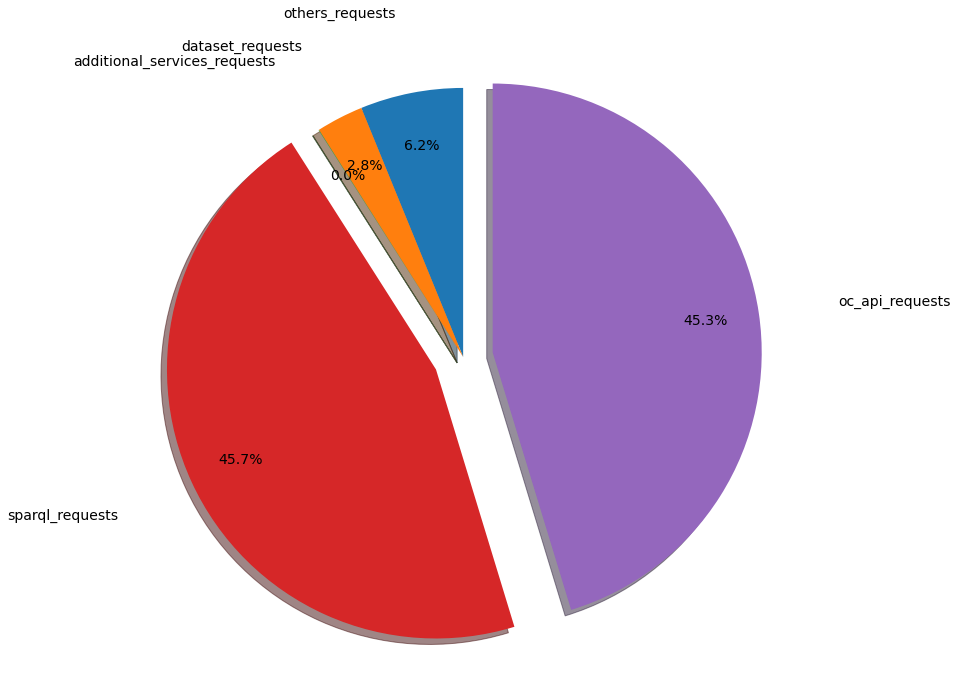

In [89]:
import matplotlib.pyplot as plt
labels = []
sizes = []
for k,v in counter_total_dict.items():
    labels.append(k)
    sizes.append(v["value"])

explode = (0, 0, 0, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', radius = 0.9,
        shadow=True, startangle=90, pctdistance=0.8, labeldistance=1.3, textprops={'fontsize': 14})
ax1.axis('equal')
plt.rcParams["figure.figsize"] = (12,12)

plt.show()

#### 2.3) Visualizzazione a Torta degli endpoints

[37086, 76, 13, 48668, 607, 191, 7917, 1380134, 190, 0, 302336, 0, 0, 1074090]


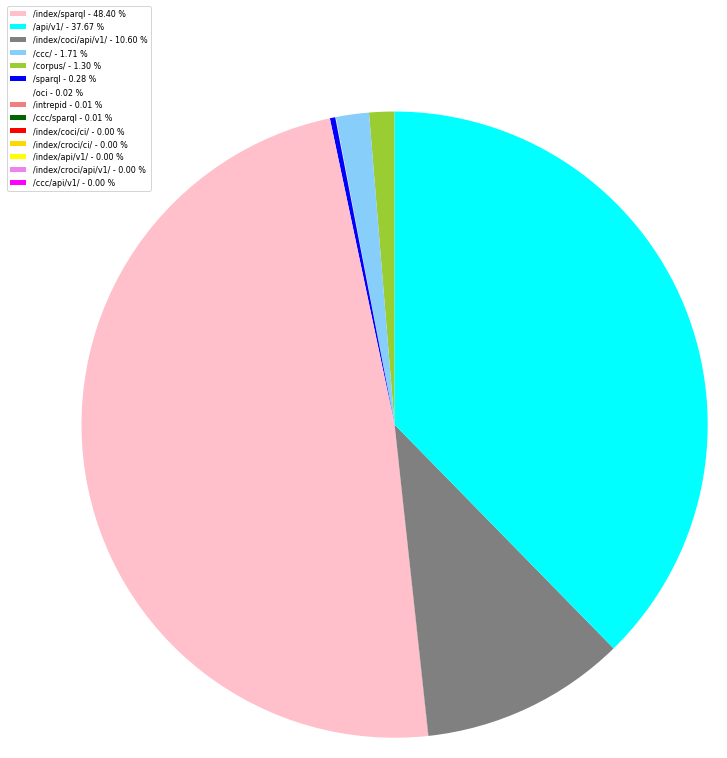

In [121]:
import matplotlib.pyplot as plt
labels = []
sizes = []
for k,v in counter_total_dict.items():
    for i,j in v.items():
        if i == "endpoints":
            for f,e in j.items():      
                labels.append(f)
                sizes.append(int(e))
print(sizes)

                
y = np.array(sizes)


colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']

porcent = 100.*y/y.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0.1)
patches, texts = plt.pie(sizes, colors=colors, startangle=90, radius=1.2)
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda sizes: sizes[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.show()



### 3) Estrazione valori mensili dal valore delle metriche
Per le metriche che non hanno labels e hanno un solo valore per prom mensile
<ol>
    <li>opencitations_indexed_records: interessante vedere se cresce ad intervalli, magari con un barchart</li>
    <li>opencitations_harvested_data_sources: costante, non è rilevante</li>
</ol>

In [63]:
def get_metrics_value(year, month, api, metric):
    result = dict()
    PROMETHEUS = api + year + "-" + month
    r = get(PROMETHEUS)
    if r.status_code == 200:
        metrics = requests.get(PROMETHEUS).content.decode('utf-8')
        #print(metrics)
        for family in text_string_to_metric_families(metrics):
            #print(family)
            for sample in family.samples:
                #print("Name: {0} Labels: {1} Value: {2}".format(*sample))
                if metric in "Name:{0}".format(*sample):
                    res = "{2}".format(*sample)
                    metric = metric + "_" + year + "_" + month
                    result[metric] = float(res)

                else:
                    pass
    else:
        return None
    
    return result

get_metrics_value(y_22, gen, url, "opencitations_indexed_records")

{'opencitations_indexed_records_2022_01': 1271360867.0}

### 4) Raggruppamento dei valori per gruppi di mesi (da valori mensili direttamente dalle metriche)

In [64]:
def collect_metrics_values(n, api, metric):
    count = 0
    result_dict = {}
    metrics_values = dict()
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    years = ["2021", "2022"]
    for y in years:
        for m in months:
            res_values = get_metrics_value(y, m, api, metric)
            if res_values is not None:
                if len(metrics_values) == n:
                    result_dict[count] = metrics_values
                    metrics_values = dict()
                    count += 1
                    (metrics_values).update(res_values)
                else:
                    (metrics_values).update(res_values)
            
            else:
                result_dict[count] = metrics_values
                metrics_values = dict()
                count += 1
                return result_dict
    return result_dict

collect_metrics_values(3, url, "opencitations_indexed_records")

{0: {'opencitations_indexed_records_2021_01': 759516507.0,
  'opencitations_indexed_records_2021_02': 759516507.0,
  'opencitations_indexed_records_2021_03': 759516507.0},
 1: {'opencitations_indexed_records_2021_04': 759516507.0,
  'opencitations_indexed_records_2021_05': 759516507.0,
  'opencitations_indexed_records_2021_06': 759516507.0},
 2: {'opencitations_indexed_records_2021_07': 759516507.0,
  'opencitations_indexed_records_2021_08': 1094394688.0,
  'opencitations_indexed_records_2021_09': 1186958898.0},
 3: {'opencitations_indexed_records_2021_10': 1186958898.0,
  'opencitations_indexed_records_2021_11': 1235170583.0,
  'opencitations_indexed_records_2021_12': 1235170583.0},
 4: {'opencitations_indexed_records_2022_01': 1271360867.0,
  'opencitations_indexed_records_2022_02': 1271360867.0}}

In [65]:
def group_metrics_values(n, api, metric):
    max_values_dict = dict()
    metrics_nested_dicts = collect_metrics_values(n, api, metric)
    for k,v in metrics_nested_dicts.items():
        max_val = max(v.values())
        max_values_dict[k] = max_val
    return max_values_dict
    
group_metrics_values(3, url, "opencitations_indexed_records")

{0: 759516507.0,
 1: 759516507.0,
 2: 1186958898.0,
 3: 1235170583.0,
 4: 1271360867.0}

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 5) Visualizzazione della crescita trimestrale degli indexed records in OC

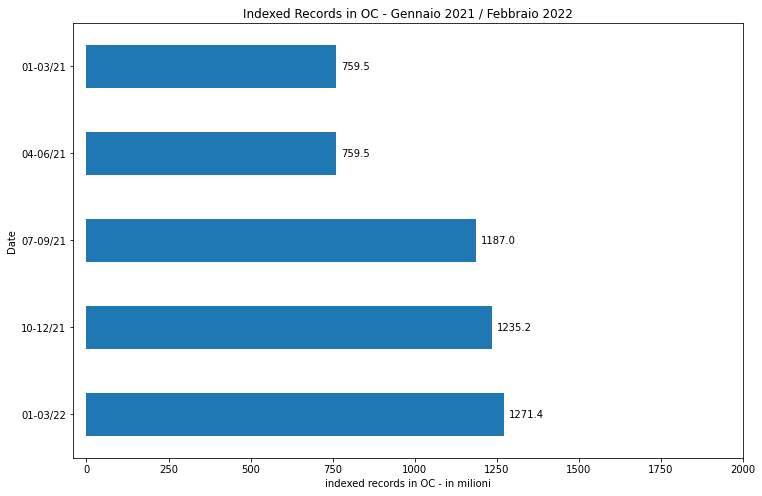

In [74]:
records = [1271.3608670, 1235.1705830, 1186.9588980, 759.5165070, 759.5165070]

records_series = pd.Series(records)
y_labels = ["01-03/22", "10-12/21", "07-09/21", "04-06/21", "01-03/21"]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = records_series.plot(kind='barh')
ax.set_title('Indexed Records in OC - Gennaio 2021 / Febbraio 2022')
ax.set_xlabel('indexed records in OC - in milioni')
ax.set_ylabel('Date')
ax.set_yticklabels(y_labels)
ax.set_xlim(-40, 2000) # expand xlim to make labels easier to read

rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{:.1f}".format(x_value)
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

#source: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart



plt.savefig("indexed_records_01_21-02_22.png")

In [122]:
#In verticale si può fare per le classi delle richieste !!!!!

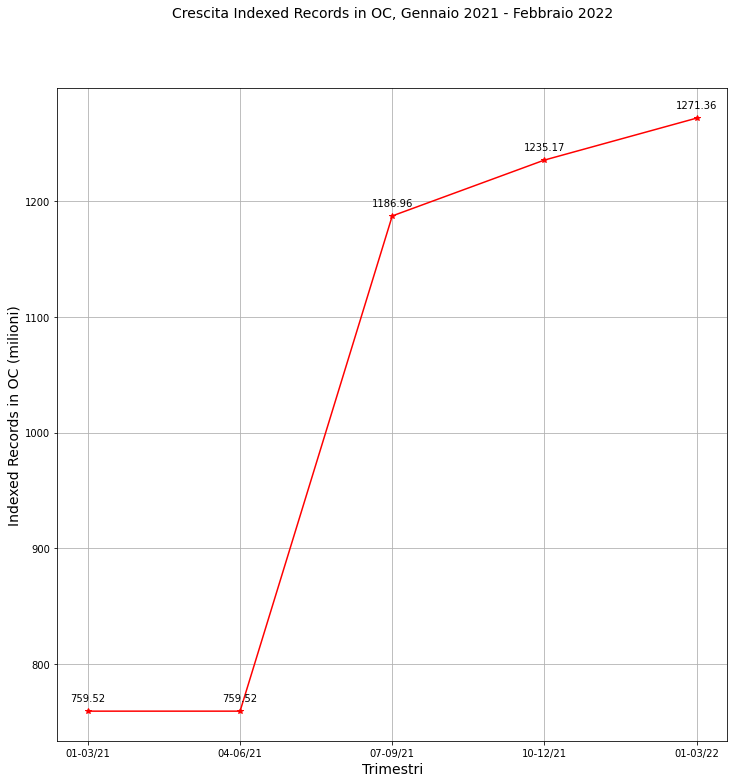

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

[759.5165070, 759.5165070, 1186.9588980, 1235.1705830, 1271.3608670]

Data = {'Trimestri': ["01-03/21", "04-06/21", "07-09/21", "10-12/21", "01-03/22"],
        'Indexed Records in OC (milioni)': [759.5165070, 759.5165070, 1186.9588980, 1235.1705830, 1271.3608670]
       }
  
df = pd.DataFrame(Data,columns=['Trimestri','Indexed Records in OC (milioni)'])
  
plt.plot(df['Trimestri'], df['Indexed Records in OC (milioni)'], color='red', marker='*')
    
plt.title('Crescita Indexed Records in OC, Gennaio 2021 - Febbraio 2022', fontsize=14, x=0.5, y=1.1)
plt.xlabel('Trimestri', fontsize=14)
plt.ylabel('Indexed Records in OC (milioni)', fontsize=14)
plt.grid(True)

for x,y in zip(df['Trimestri'],df['Indexed Records in OC (milioni)']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

### Idee e Proposte
#### Visualizzazioni 
<ol>
    <li>Pie Chart gerarchico per visualizzare richieste a categorie di servizi e (nello specifico) ad endpoints (annuale)</li>
    <li>Bar chart per visualizzare categorie di servizi(annuale)</li>
    <li>Line graph per visualizzare andamento trimestrale nel corso di un anno (aumento degli indexed records)</li>
    <li>Line graph runtime con axios dove l'utente specifica due date e vede la crescita del grafico (date selezionabili)</li>
    <li>Pie chart runtime per visualizzare distribuzione delle richieste per categorie su base mensile (mensile)</li>
</ol>

#### Da Fare
<ol>
    <li>Landing Page HTML per visualizzazioni</li>
    <li>Visualizzazioni in JS partendo da dati estratti con Python</li>
    <li>Visualizzazioni JS con dati estratti con JS</li>
</ol>

#### Fonti 
<ol>
    <li><a href="https://github.com/axios/axios">https://github.com/axios/axios</a></li>    
    <li><a href="https://github.com/yunyu/parse-prometheus-text-format">https://github.com/yunyu/parse-prometheus-text-format</a></li>
    
</ol>